# Introduction
* **작성자**: 박소희
* **본 주피터 코드 목적**: GEO RNA-seq의 DEG 분석을 위함
* **데이터셋**: GSE167186
* **데이터셋 설명**:
    * Experiment type: Expression profiling by high throughput sequencing
    * Platform: Illumina HiSeq 4000
    * Experiment molecule: total RNA
* **샘플 설명**:
    * 평균 20세 (Young): 19명
    * 평균 75세 (Old) non-sarcopenic: 29명
    * 평균 75세 (Old) sarcopenic: 24명
* **참고 논문**: https://www.aging-us.com/article/204435/text
* **데이터셋 링크**: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE167186
* **PyDESeq2 참고 코드**: https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_pandas_io_example.html
* **Enrichr**: https://maayanlab.cloud/Enrichr/enrich#

In [1]:
pwd

'/Users/soheepark/01-RNA/Analysis'

# Data collection
* DEG 분석을 위해 **Count table**과 샘플의 그룹 정보가 포함된 **Metadata**가 필요합니다.
* 아래에서 **Count table**과 **Metadata table**을 불러와 형태를 확인합니다.

In [1]:
import pandas as pd
import scanpy as sc

/Users/soheepark/anaconda3/envs/pydeseq2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 먼저 **Count table을 확인**해봅니다.

In [3]:
# Count table 로드
counts = pd.read_csv('/Users/soheepark/03-GEO근감소/Data/1_GSE167186/GSE167186_counts.csv', index_col=0)
print(counts.shape)
counts.head()

(36694, 76)


,X_10,X_11,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_1,...,X_75,X_76,X_77,X_78,X_79,X_7,X_80,X_81,X_8,X_9
Symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,6,8,10,6,4,2,5,3,5,3,...,5,7,6,9,3,3,7,5,4,1
TNMD,0,1,0,0,1,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
DPM1,20,35,14,22,17,9,30,22,22,16,...,34,22,35,20,23,19,40,12,6,34
SCYL3,18,10,6,18,9,9,11,18,8,6,...,11,13,11,12,12,9,5,8,5,10
C1orf112,1,2,1,1,2,0,0,1,0,0,...,2,0,0,1,1,0,0,1,2,0


다음으로 **Metadata를 확인**해봅니다.

In [4]:
# Metadata 로드
meta = pd.read_table('/Users/soheepark/03-GEO근감소/Data/1_GSE167186/GSE167186-GPL20301_series_matrix.txt', sep='\t', skiprows=30, index_col=0)
meta.head()

,X_10,X_11,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_1,...,X_75,X_76,X_77,X_78,X_79,X_7,X_80,X_81,X_8,X_9
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM5098661,GSM5098662,GSM5098663,GSM5098664,GSM5098665,GSM5098666,GSM5098667,GSM5098668,GSM5098669,GSM5098670,...,GSM5098727,GSM5098728,GSM5098729,GSM5098730,GSM5098731,GSM5098732,GSM5098733,GSM5098734,GSM5098735,GSM5098736
!Sample_status,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,...,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022,Public on Mar 31 2022
!Sample_submission_date,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,...,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021,Feb 21 2021
!Sample_last_update_date,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,...,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023,Sep 14 2023
!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA


`!Sample_characteristics_ch1` 행에 **환자 그룹의 특징이 저장**되어 있습니다.

In [14]:
print(meta.index)

Index(['!Sample_geo_accession', '!Sample_status', '!Sample_submission_date',
       '!Sample_last_update_date', '!Sample_type', '!Sample_channel_count',
       '!Sample_source_name_ch1', '!Sample_organism_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_molecule_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_taxid_ch1', '!Sample_description', '!Sample_description',
       '!Sample_description', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_platform_id', '!Sample_contact_name', '!

In [15]:
meta.loc['!Sample_characteristics_ch1']

,X_10,X_11,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_1,...,X_75,X_76,X_77,X_78,X_79,X_7,X_80,X_81,X_8,X_9
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_characteristics_ch1,group: Sarcopenia,group: Old Healthy,group: Sarcopenia,group: Old Healthy,group: Old Healthy,group: Old Healthy,group: Sarcopenia,group: Old Healthy,group: Sarcopenia,group: Sarcopenia,...,group: Old Healthy,group: Old Healthy,group: Sarcopenia,group: Old Healthy,group: UNCLASSIFIED,group: Sarcopenia,group: Old Healthy,group: Sarcopenia,group: Old Healthy,group: Old Healthy
!Sample_characteristics_ch1,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,...,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle,tissue: Skeletal muscle
!Sample_characteristics_ch1,age: 68,age: 87,age: 83,age: 77,age: 82,age: 73,age: 77.9,age: 64,age: 77,age: 67,...,age: 66,age: 70,age: 71,age: 66,age: 71,age: 73,age: 71,age: 67,age: 76,age: 66
!Sample_characteristics_ch1,6 min walk test (m/s): 1.01010101,6 min walk test (m/s): 1.08892922,6 min walk test (m/s): 1.425178147,6 min walk test (m/s): 0.918836141,biodex (kg): 127.9,biodex (kg): 202.7,6 min walk test (m/s): 0.886262925,6 min walk test (m/s): 1.086956522,6 min walk test (m/s): 1.041666667,biodex (kg): 148.7,...,6 min walk test (m/s): 1.366742597,6 min walk test (m/s): 1.363636364,6 min walk test (m/s): 0.896860987,6 min walk test (m/s): 1.388888889,6 min walk test (m/s): 1.098901099,6 min walk test (m/s): 1.229508197,6 min walk test (m/s): 1.054481547,6 min walk test (m/s): 0.930232558,6 min walk test (m/s): 1.096892139,6 min walk test (m/s): 0.805369128
!Sample_characteristics_ch1,biodex (kg): 166.2,biodex (kg): 136.4,biodex (kg): 143.1,biodex (kg): 222.1,time up and go (s): 7.16,time up and go (s): 8.27,biodex (kg): 171.7,biodex (kg): 203.9,biodex (kg): 143.8,time up and go (s): 7.85,...,biodex (kg): 236.1,biodex (kg): 244.1,biodex (kg): 106.5,biodex (kg): 239.6,biodex (kg): 195.3,biodex (kg): 155,biodex (kg): 215,biodex (kg): 184.4,biodex (kg): 144.5,biodex (kg): 208.8
!Sample_characteristics_ch1,time up and go (s): 7.15,time up and go (s): 7.82,time up and go (s): 7.97,time up and go (s): 6.56,sppb: 12,sppb: 12,time up and go (s): 7.21,time up and go (s): 6.83,time up and go (s): 8.37,grip strength (kg): 41.3,...,time up and go (s): 6.1,time up and go (s): 7.94,time up and go (s): 8.96,time up and go (s): 5.97,time up and go (s): 7.01,time up and go (s): 7.59,time up and go (s): 7.91,time up and go (s): 7.27,time up and go (s): 8.2,time up and go (s): 7.82
!Sample_characteristics_ch1,sppb: 12,sppb: 11,sppb: 10,sppb: 11,grip strength (kg): 35.1,grip strength (kg): 49.1,sppb: 9,sppb: 12,sppb: 7,NaN,...,sppb: 12,sppb: 12,sppb: 8,sppb: 11,sppb: 12,sppb: 11,sppb: 11,sppb: 11,sppb: 10,sppb: 10
!Sample_characteristics_ch1,grip strength (kg): 41.8,grip strength (kg): 24.2,grip strength (kg): 40,grip strength (kg): 35.5,leg press (kg): 94.5,leg press (kg): 145.5,grip strength (kg): 45.5,grip strength (kg): 42.7,grip strength (kg): 33.7,NaN,...,leg press (kg): 157.5,grip strength (kg): 47.6,grip strength (kg): 28.2,grip strength (kg): 42.2,leg press (kg): 139.5,grip strength (kg): 34.3,leg press (kg): 130.5,grip strength (kg): 40.1,grip strength (kg): 41.5,grip strength (kg): 42.2
!Sample_characteristics_ch1,leg press (kg): 130.5,leg press (kg): 129.55,leg press (kg): 127.27,leg press (kg): 229.5,NaN,NaN,leg press (kg): 87.5,leg press (kg): 112.5,leg press (kg): 112.5,NaN,...,NaN,leg press (kg): 166,leg press (kg): 63.5,leg press (kg): 166.5,NaN,leg press (kg): 127.27,NaN,leg press (kg): 130.5,leg press (kg): 94.5,leg press (kg): 147.73


`!Sample_characteristics_ch1` 행에서 **그룹 정보가 들어간 행**을 사용할겁니다.  
다음에서 개수를 확인해봅니다.

In [16]:
meta.iloc[8].value_counts()

group: Old Healthy      29
group: Sarcopenia       24
group: Young Healthy    19
group: UNCLASSIFIED      4
Name: !Sample_characteristics_ch1, dtype: int64

# Preprocessing

## Preperation of metadata

다음은 Metadata 정보를 분석에 바로 활용할 수 있도록 전처리하는 과정입니다.  
1. dataframe으로 만듭니다.
2. index 기준 오름차순으로 정렬합니다.
3. 불필요한 문자열을 삭제합니다.
4. 분석에 필요한 그룹만 남겨둡니다.

In [17]:
# group을 나타내는 Metadata를 dataframe으로 만들기
metadata = pd.DataFrame(meta.iloc[8])
metadata.rename(columns = {metadata.columns[0]:'Condition'}, inplace=True)
metadata.head()

,Condition
X_10,group: Sarcopenia
X_11,group: Old Healthy
X_13,group: Sarcopenia
X_14,group: Old Healthy
X_15,group: Old Healthy


In [18]:
# group 이라는 문자열 자르기
metadata = pd.DataFrame(metadata['Condition'].apply(lambda x:x.split('group: ')[-1]))
print(metadata.Condition.unique())
metadata.head()

['Sarcopenia' 'Old Healthy' 'UNCLASSIFIED' 'Young Healthy']


,Condition
X_10,Sarcopenia
X_11,Old Healthy
X_13,Sarcopenia
X_14,Old Healthy
X_15,Old Healthy


In [19]:
# UNCLASSIFIED 제외한 인덱스 추출
metadata = metadata[metadata['Condition']!='UNCLASSIFIED']
metadata.shape
metadata.head()

,Condition
X_10,Sarcopenia
X_11,Old Healthy
X_13,Sarcopenia
X_14,Old Healthy
X_15,Old Healthy


In [20]:
# Condition 복사 및 약어로 바꾸기
metadata['Temp'] = metadata['Condition']
metadata['Temp'].replace({'Old Healthy':'OH', 'Young Healthy':'YH', 'Sarcopenia':'OS'}, inplace = True)
metadata.head()

,Condition,Temp
X_10,Sarcopenia,OS
X_11,Old Healthy,OH
X_13,Sarcopenia,OS
X_14,Old Healthy,OH
X_15,Old Healthy,OH


In [21]:
metadata['Temp2'] = metadata.index
metadata['Temp2'] = metadata['Temp2'].apply(lambda x:x.split('_')[-1])
metadata['Temp3'] = metadata['Temp']+'_'+metadata['Temp2']
metadata.head()

,Condition,Temp,Temp2,Temp3
X_10,Sarcopenia,OS,10,OS_10
X_11,Old Healthy,OH,11,OH_11
X_13,Sarcopenia,OS,13,OS_13
X_14,Old Healthy,OH,14,OH_14
X_15,Old Healthy,OH,15,OH_15


## Preperation of count data
다음은 Count data를 분석에 바로 활용할 수 있도록 전처리하는 과정입니다.
1. 분석하지 않는 Unclassified 그룹을 제외합니다.
2. 행에 샘플, 열에 유전자 이름이 나오도록 transpose 합니다.

In [22]:
# UNCLASSIFIED 제외한 테이블 추출
counts = counts[list(metadata.index)]
counts.head()

,X_10,X_11,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_1,...,X_74,X_75,X_76,X_77,X_78,X_7,X_80,X_81,X_8,X_9
Symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,6,8,10,6,4,2,5,3,5,3,...,5,5,7,6,9,3,7,5,4,1
TNMD,0,1,0,0,1,1,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
DPM1,20,35,14,22,17,9,30,22,22,16,...,18,34,22,35,20,19,40,12,6,34
SCYL3,18,10,6,18,9,9,11,18,8,6,...,11,11,13,11,12,9,5,8,5,10
C1orf112,1,2,1,1,2,0,0,1,0,0,...,0,2,0,0,1,0,0,1,2,0


## Data filtering
* 발현량이 없는 유전자를 필터링합니다.
* 코멘트: %로 필터링해보기 (논문참고)

In [23]:
# 전체 샘플에서 발현량이 없는 유전자를 필터링합니다.
print(f'필터링 전 테이블: {counts.shape}')
counts = counts[counts.sum(axis=1)>0]
print(f'필터링 후 테이블: {counts.shape}')

필터링 전 테이블: (36694, 72)
필터링 후 테이블: (22126, 72)


In [24]:
# 행은 샘플명, 열은 유전자 명으로 transpose
counts = counts.T
counts.head()

Symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,KMT5AP1,BCLAF1P2,LINC01126,CCDC28A.AS1,RPL23AP61,GATD3B,PCDH20,UCKL1.AS1,FRG1KP,ERICD
X_10,6,0,20,18,1,3,34,8,11,3,...,1,2,0,0,0,0,0,4,0,0
X_11,8,1,35,10,2,1,30,2,17,2,...,0,0,0,0,0,0,0,2,0,0
X_13,10,0,14,6,1,1,35,2,15,3,...,0,0,0,0,0,0,0,0,0,0
X_14,6,0,22,18,1,0,11,4,18,5,...,1,0,0,0,0,0,0,2,0,0
X_15,4,1,17,9,2,0,27,7,15,4,...,0,2,0,1,0,0,0,2,0,0


In [26]:
metadata.index ==counts.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [27]:
counts.index = metadata['Temp3']
counts.index.name = 'Sample'
counts.head()

Symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,KMT5AP1,BCLAF1P2,LINC01126,CCDC28A.AS1,RPL23AP61,GATD3B,PCDH20,UCKL1.AS1,FRG1KP,ERICD
Sample,,,,,,,,,,,,,,,,,,,,,
OS_10,6,0,20,18,1,3,34,8,11,3,...,1,2,0,0,0,0,0,4,0,0
OH_11,8,1,35,10,2,1,30,2,17,2,...,0,0,0,0,0,0,0,2,0,0
OS_13,10,0,14,6,1,1,35,2,15,3,...,0,0,0,0,0,0,0,0,0,0
OH_14,6,0,22,18,1,0,11,4,18,5,...,1,0,0,0,0,0,0,2,0,0
OH_15,4,1,17,9,2,0,27,7,15,4,...,0,2,0,1,0,0,0,2,0,0


In [28]:
metadata.index = metadata['Temp3']
metadata.index.name = 'Sample'
metadata = metadata[['Condition']]

# DEG analysis

**사전 설치**:  
`pip install pydeseq2`  
`pip install sanbomics`  

**Requirement**:  
아래 사이트에서 pydeseq2의 설치를 위한 패키지 의존성을 확인합니다.  
https://pydeseq2.readthedocs.io/en/latest/usage/requirements.html

In [29]:
import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

## DeseqDataSet  

https://pydeseq2.readthedocs.io/en/latest/api/docstrings/pydeseq2.dds.DeseqDataSet.html 

* DeseqDataSet은 AnnData 클래스를 확장하여 사용
* 분산 및 logFC은 DESeq2 파이프라인에 따라 추정됨

### Subset 

In [30]:
# raw 저장
metadata_raw = metadata
counts_raw = counts

In [31]:
# 3개 비교군 나누기
metadata_osoh = metadata[(metadata['Condition']=='Sarcopenia') | (metadata['Condition']=='Old Healthy')]
metadata_osyh = metadata[(metadata['Condition']=='Sarcopenia') | (metadata['Condition']=='Young Healthy')]
metadata_yhoh = metadata[(metadata['Condition']=='Young Healthy') | (metadata['Condition']=='Old Healthy')]

counts_osoh = counts.loc[metadata_osoh.index]
counts_osyh = counts.loc[metadata_osyh.index]
counts_yhoh = counts.loc[metadata_yhoh.index]

아래에서 비교 그룹 선정하면됩니다.

In [35]:
metadata = metadata_osoh
counts = counts_osoh

### Build DeseqDataSet 

In [36]:
dds = DeseqDataSet(counts=counts,
                   metadata=metadata,
                   design_factors="Condition")
dds

AnnData object with n_obs × n_vars = 53 × 22126
    obs: 'Condition'
    obsm: 'design_matrix'

In [37]:
dds.obs.Condition.unique()

array(['Sarcopenia', 'Old Healthy'], dtype=object)

## Run DESeq2  
분산과 logFC를 fit하기 위해 DESeq2 파이프라인에 따라 추정됩니다. 아래와 같은 항목이 계산되어 anndata에 추가됩니다.
* Compute normalization factors
* Fit dispersion trend coefficients
* Dispersion priors
* MAP Dispersions
* Fit log fold changes
* Calculate Cooks distances and refit (Optional)  

In [38]:
# deseq 계산
dds.deseq2()

Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 5.13 seconds.

Fitting dispersion trend curve...
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 7.48 seconds.

Fitting LFCs...
... done in 3.44 seconds.

Replacing 27 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Anndata에 다음 항목이 추가됩니다.  
* `X`: the count data
* `obs`: design factors
* `obsm`: sample-level data (ex: design_matrix, size_factors)
* `varm`: gene-level data (ex: dispersions, LFC)

In [40]:
dds

AnnData object with n_obs × n_vars = 53 × 22126
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [41]:
# sample-level data
print(dds.obsm["design_matrix"].head())
print(dds.obsm["size_factors"])

        intercept  Condition_Sarcopenia_vs_Old Healthy
Sample                                                
OS_10           1                                    1
OH_11           1                                    0
OS_13           1                                    1
OH_14           1                                    0
OH_15           1                                    0
[1.11103304 1.12935014 0.85108753 1.04020432 1.01068348 0.73832987
 1.09633524 1.07250004 1.00190964 1.19605758 1.01465341 1.09637841
 1.07463549 1.23944725 1.43836538 1.00450901 1.01648748 1.38492758
 1.06790258 0.76056644 0.77821978 0.77841113 1.07002117 0.86769558
 0.86819241 0.91308369 0.97145687 0.98615275 0.89334842 1.14809786
 1.50565585 1.17554241 0.78645205 1.16792174 0.92328421 0.82071215
 1.02564277 1.27407196 1.10603812 1.1445559  1.17708079 1.0554586
 1.07441676 1.00590554 1.30710308 1.12463786 0.95739811 1.19884304
 0.86478351 1.23756357 0.89911284 0.56386162 0.82054756]


In [42]:
# gene-level data
print(dds.varm["dispersions"])
print(dds.varm["LFC"])

[5.24713301e-02 6.92084485e-01 4.98130231e-02 ... 3.20363590e-01
 5.30000000e+01 1.15100108e+01]
           intercept  Condition_Sarcopenia_vs_Old Healthy
Symbol                                                   
TSPAN6      1.690499                             0.108985
TNMD       -0.623725                            -0.259485
DPM1        3.126379                            -0.051246
SCYL3       2.328168                            -0.071793
C1orf112   -0.349174                            -0.371310
...              ...                                  ...
GATD3B     -1.638770                            -0.076147
PCDH20     -1.638770                            -0.076147
UCKL1.AS1   0.751062                            -0.221876
FRG1KP     -1.638770                            -0.076147
ERICD      -1.569807                             0.271556

[22126 rows x 2 columns]


In [52]:
dds.X

array([[ 6,  0, 20, ...,  4,  0,  0],
       [ 8,  1, 35, ...,  2,  0,  0],
       [10,  0, 14, ...,  0,  0,  0],
       ...,
       [ 5,  0, 12, ...,  1,  0,  0],
       [ 4,  0,  6, ...,  7,  0,  0],
       [ 1,  0, 34, ...,  0,  0,  0]])

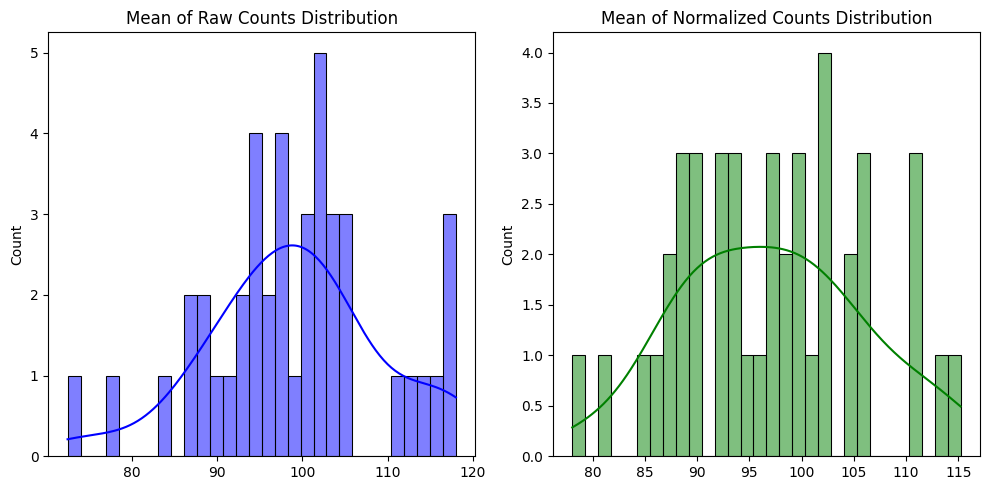

In [159]:
# Raw count 및 Normalized count 유전자 발현량 분포 확인

# 각 열의 합 또는 평균을 계산
column_raw = dds.X.mean(axis=1)  # Raw count 평균
column_norm = dds.layers['normed_counts'].mean(axis=1)  # Normazlied 평균

# 합 또는 평균의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 5))

# Raw count 평균 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(column_raw, kde=True, color="blue", bins=30)
plt.title("Mean of Raw Counts Distribution")

# Normazlied 평균 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(column_norm, kde=True, color="green", bins=30)
plt.title("Mean of Normalized Counts Distribution")

plt.tight_layout()
plt.show()

In [158]:
print(dds.X.mean(axis=1).max())
print(dds.layers['normed_counts'].mean(axis=1).max())

118.00031636988159
115.22282766601764


## DeseqStats

https://pydeseq2.readthedocs.io/en/latest/api/docstrings/pydeseq2.ds.DeseqStats.html

* 미분 표현을 위한 PyDESeq2 통계 테스트
* DESeq2 파이프라인에 따라 차등 유전자 발현에 대한 p-value 추정
* apeGLM logFC 축소 지원

In [53]:
stat_res = DeseqStats(dds, contrast=('Condition', 'Sarcopenia', 'Old Healthy')) # 'Young Healthy', 'Old Healthy', 'Sarcopenia'
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition Sarcopenia vs Old Healthy
            baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
Symbol                                                                  
TSPAN6      5.654878        0.157232  0.187526  0.838455  0.401775   NaN
TNMD        0.473517       -0.374358  0.666634 -0.561563  0.574413   NaN
DPM1       22.147004       -0.073933  0.122160 -0.605212  0.545038   NaN
SCYL3       9.969259       -0.103576  0.142321 -0.727765  0.466758   NaN
C1orf112    0.626903       -0.535687  0.594839 -0.900558  0.367823   NaN
...              ...             ...       ...       ...       ...   ...
GATD3B      0.014435       -0.109857  3.040828 -0.036127  0.971181   NaN
PCDH20      0.018396       -0.109857  3.040828 -0.036127  0.971181   NaN
UCKL1.AS1   1.937287       -0.320099  0.365847 -0.874953  0.381599   NaN
FRG1KP      0.017592       -0.109857  3.040828 -0.036127  0.971181   NaN
ERICD       0.128866        0.391772  1.574705  0.

... done in 1.46 seconds.



In [54]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Symbol,,,,,,
TSPAN6,5.654878,0.157232,0.187526,0.838455,0.401775,NaN
TNMD,0.473517,-0.374358,0.666634,-0.561563,0.574413,NaN
DPM1,22.147004,-0.073933,0.122160,-0.605212,0.545038,NaN
SCYL3,9.969259,-0.103576,0.142321,-0.727765,0.466758,NaN
C1orf112,0.626903,-0.535687,0.594839,-0.900558,0.367823,NaN
...,...,...,...,...,...,...
GATD3B,0.014435,-0.109857,3.040828,-0.036127,0.971181,NaN
PCDH20,0.018396,-0.109857,3.040828,-0.036127,0.971181,NaN
UCKL1.AS1,1.937287,-0.320099,0.365847,-0.874953,0.381599,NaN


# Ensemble to Symbol (if needed)

In [55]:
from sanbomics.tools import id_map

In [56]:
mapper = id_map(species='human')

In [57]:
res['Symbol']=res.index.map(mapper.mapper)

In [58]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Symbol,,,,,,,
TSPAN6,5.654878,0.157232,0.187526,0.838455,0.401775,NaN,NaN
TNMD,0.473517,-0.374358,0.666634,-0.561563,0.574413,NaN,NaN
DPM1,22.147004,-0.073933,0.122160,-0.605212,0.545038,NaN,NaN
SCYL3,9.969259,-0.103576,0.142321,-0.727765,0.466758,NaN,NaN
C1orf112,0.626903,-0.535687,0.594839,-0.900558,0.367823,NaN,NaN
...,...,...,...,...,...,...,...
GATD3B,0.014435,-0.109857,3.040828,-0.036127,0.971181,NaN,NaN
PCDH20,0.018396,-0.109857,3.040828,-0.036127,0.971181,NaN,NaN
UCKL1.AS1,1.937287,-0.320099,0.365847,-0.874953,0.381599,NaN,NaN


# PCA

In [59]:
sc.tl.pca(dds)
dds

AnnData object with n_obs × n_vars = 53 × 22126
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

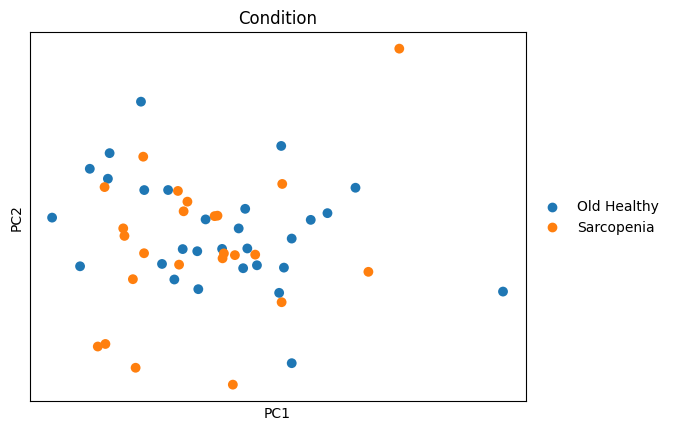

In [60]:
sc.pl.pca(dds, color='Condition', size=200)

# Heatmap

사전설치:  
`pip install fastcluster`  
fastcluster를 설치하면 큰 데이터 입력하여 클러스터맵을 그릴 때 속도 개선이 됩니다.

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
dds

AnnData object with n_obs × n_vars = 53 × 22126
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [63]:
dds.layers['normed_counts']

array([[ 5.40037945,  0.        , 18.00126483, ...,  3.60025297,
         0.        ,  0.        ],
       [ 7.08371983,  0.88546498, 30.99127424, ...,  1.77092996,
         0.        ,  0.        ],
       [11.74967277,  0.        , 16.44954188, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.56103728,  0.        , 13.34648948, ...,  1.11220746,
         0.        ,  0.        ],
       [ 7.09393913,  0.        , 10.6409087 , ..., 12.41439349,
         0.        ,  0.        ],
       [ 1.2186984 ,  0.        , 41.43574553, ...,  0.        ,
         0.        ,  0.        ]])

In [66]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [67]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Symbol,,,,,,,
TSPAN6,5.654878,0.157232,0.187526,0.838455,0.401775,NaN,NaN
TNMD,0.473517,-0.374358,0.666634,-0.561563,0.574413,NaN,NaN
DPM1,22.147004,-0.073933,0.122160,-0.605212,0.545038,NaN,NaN
SCYL3,9.969259,-0.103576,0.142321,-0.727765,0.466758,NaN,NaN
C1orf112,0.626903,-0.535687,0.594839,-0.900558,0.367823,NaN,NaN
...,...,...,...,...,...,...,...
GATD3B,0.014435,-0.109857,3.040828,-0.036127,0.971181,NaN,NaN
PCDH20,0.018396,-0.109857,3.040828,-0.036127,0.971181,NaN,NaN
UCKL1.AS1,1.937287,-0.320099,0.365847,-0.874953,0.381599,NaN,NaN


In [69]:
lfc_cutoff = 0.5

sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > lfc_cutoff)]
print(f"Total gene counts: {len(res[res.padj < 0.05])}") 
print(f"Up-regulated: {len(res[(res.padj < 0.05) & (res.log2FoldChange > lfc_cutoff)])}")
print(f"Down-regulated: {len(res[(res.padj < 0.05) & (res.log2FoldChange < -lfc_cutoff)])}")
print(f"Intersected gene counts: {len(res[res.padj < 0.05])-len(res[(res.padj < 0.05) & (abs(res.log2FoldChange) > lfc_cutoff)])}")

print(sigs.shape)
sigs.head()

Total gene counts: 26
Up-regulated: 3
Down-regulated: 1
Intersected gene counts: 22
(4, 7)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Symbol,,,,,,,
MT2A,107.233914,0.696583,0.171357,4.065090,0.000048,0.013404,NaN
H19,716.449121,0.647937,0.147809,4.383615,0.000012,0.007830,NaN
MYH8,318.804807,1.335463,0.383173,3.485273,0.000492,0.043879,NaN
MTRNR2L8,659.039671,-2.328635,0.538753,-4.322271,0.000015,0.007830,NaN


In [70]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 53 × 4
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [93]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, 
                       columns=dds_sigs.obs_names)

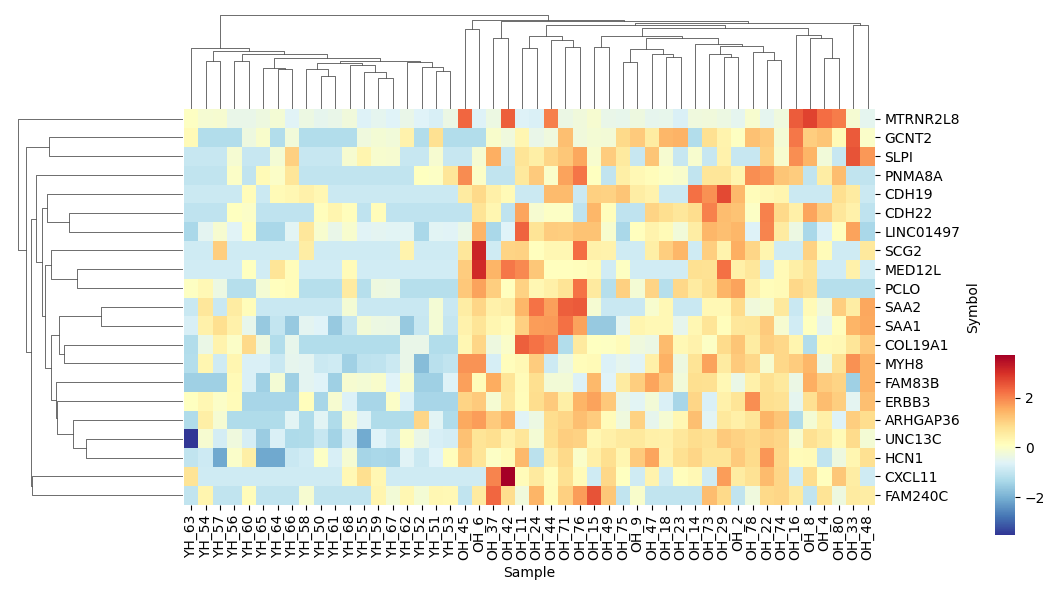

In [98]:
sns.clustermap(grapher, 
               z_score=0, 
               cmap = 'RdYlBu_r', 
               xticklabels=True,
               yticklabels=True,
               # row_cluster=None,
               cbar_pos=(1, 0.1, 0.02, 0.3),
              figsize=(10, 6))
               # figsize=(12,3))
plt.show()

# Volcanoplot
**사전설치**:  
`pip install sanbomics`

In [61]:
from sanbomics.plots import volcano

In [99]:
print(grapher.index)
res['Symbol'] = res.index

Index(['ERBB3', 'CDH19', 'COL19A1', 'GCNT2', 'SLPI', 'MYH8', 'SAA2', 'UNC13C',
       'MED12L', 'ARHGAP36', 'CDH22', 'HCN1', 'FAM83B', 'CXCL11', 'SCG2',
       'SAA1', 'PNMA8A', 'PCLO', 'FAM240C', 'LINC01497', 'MTRNR2L8'],
      dtype='object', name='Symbol')


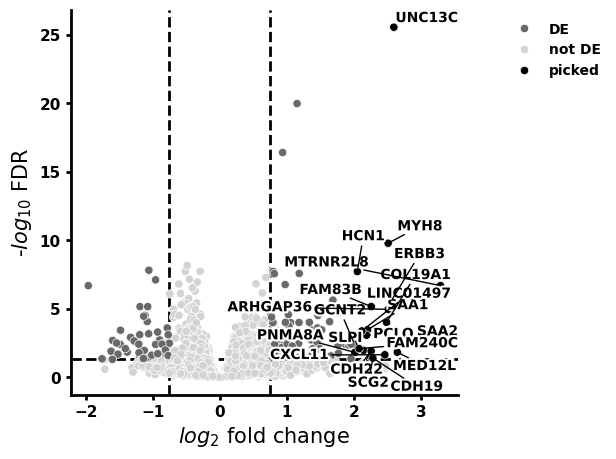

In [100]:
volcano(res, symbol='Symbol', to_label = grapher.index)

# GSEA
* (코멘트) gsea html 파일이 나옴! gmt, tms, gct 파일 input
* GO에 대한 유전자 score에 따른 정보 나옴

**사전설치**:  
`pip install gseapy`

gseapy: https://gseapy.readthedocs.io/en/latest/gseapy_example.html

In [263]:
import gseapy as gp
from gseapy.plot import gseaplot

In [257]:
res.head()
res['Symbol'] = res.index

In [258]:
ranking = res[['Symbol','stat']].dropna().sort_values('stat', ascending=False)
ranking

,Symbol,stat
Symbol,,
MTRNR2L8,MTRNR2L8,4.902149
CCDC69,CCDC69,4.491388
ATRNL1,ATRNL1,4.465966
PHKG1,PHKG1,4.384207
PDHX,PDHX,3.930602
...,...,...
MT2A,MT2A,-4.228930
NHLH2,NHLH2,-4.430774
FGF7,FGF7,-4.462153


In [260]:
ranking = ranking.drop_duplicates('Symbol')
ranking

,Symbol,stat
Symbol,,
MTRNR2L8,MTRNR2L8,4.902149
CCDC69,CCDC69,4.491388
ATRNL1,ATRNL1,4.465966
PHKG1,PHKG1,4.384207
PDHX,PDHX,3.930602
...,...,...
MT2A,MT2A,-4.228930
NHLH2,NHLH2,-4.430774
FGF7,FGF7,-4.462153


In [265]:
manual_set = {'things':['COL19A1', 'H19', 'FGF7', 'NHLH2', 'MT2A']}

In [268]:
del ranking['Symbol']

In [269]:
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 100)

2024-04-16 15:54:04,491 [WARNING] Duplicated values found in preranked stats: 12.88% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [270]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__cytoplasmic transl...,0.015365,-0.583396,-1.982701
1,GO_Biological_Process_2021__cotranslational pr...,0.023048,-0.580798,-1.984047
2,GO_Biological_Process_2021__fluid transport (G...,0.024669,0.760161,1.937442
3,GO_Biological_Process_2021__response to proges...,0.044450,-0.726006,-1.873970
4,GO_Biological_Process_2021__SRP-dependent cotr...,0.046096,-0.578866,-1.993732
...,...,...,...,...
2695,GO_Biological_Process_2021__positive regulatio...,0.999247,-0.244509,-0.555506
2696,GO_Biological_Process_2021__leukotriene metabo...,0.999505,-0.220434,-0.566633
2697,GO_Biological_Process_2021__regulation of chol...,0.999728,-0.222872,-0.556989
2698,GO_Biological_Process_2021__endocrine system d...,0.999856,-0.189325,-0.438974


In [290]:
print(out_df.sort_values('nes').iloc[0].Term)
print(out_df.sort_values('nes').iloc[1].Term)

GO_Biological_Process_2021__SRP-dependent cotranslational protein targeting to membrane (GO:0006614)
GO_Biological_Process_2021__cotranslational protein targeting to membrane (GO:0006613)


In [310]:
my_term = out_df.sort_values('nes').iloc[0].Term
my_term

'GO_Biological_Process_2021__SRP-dependent cotranslational protein targeting to membrane (GO:0006614)'

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

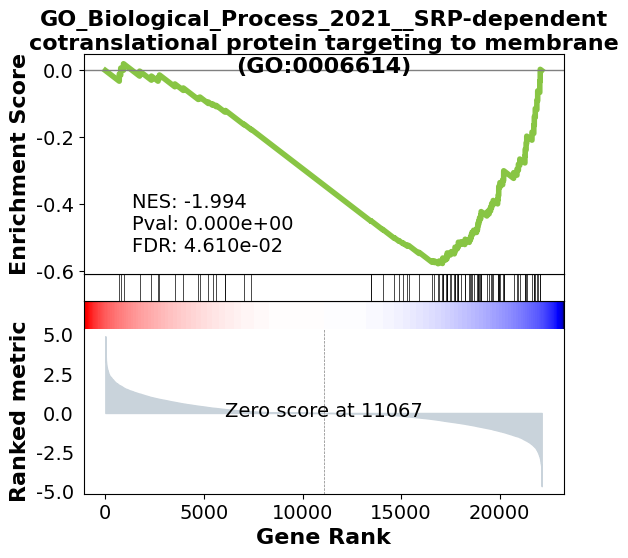

In [314]:
gseaplot(rank_metric=pre_res.ranking, term=my_term, **pre_res.results[my_term])